# Exploratory Data Analysis and Machine Learning Classification on Stroke Prediction

In this notebook, I performed an EDA on the 'Stroke Prediction Dataset'. I visualized the data using the Seaborn and Plotly libraries. My comments on the graphics and results are below the code snippet.

I applied Machine Learning algorithms to this dataset. I evaluated models based on their accuracy. In addition, I applied k-Fold Cross Validation and HyperParameter Optimization. Lastly, I determined best features for some algorithms. I hope this notebook will be useful to you.

### If you like this notebook, please UPVOTE.

### If you have questions please ask them on the comment section.

### I will be glad if you can give feedback.

Content:

1. [Importing the Necessary Libraries](#1)
1. [Read Datas & Explanation of Features & Information About Datasets](#2)
   1. [Variable Descriptions](#3)
   1. [Univariate Variable Analysis](#4)
      1. [Categorical Variables](#5)
      1. [Numerical Variables](#6)
1. [Basic Data Analysis](#7)
   1. [Gender](#8)
   1. [Ever Married](#9)
   1. [Work Type](#10)
   1. [Residence Type](#11)
   1. [Smoking Status](#12)
1. [Pandas Profiling](#13)
1. [Correlation](#14)
1. [Anomaly Detection](#15)
1. [Missing Values](#16)
   1. [bmi](#17)
1. [Encoding](#18)
   1. [Label Encoding](#19)
   1. [One-Hot Encoding](#20)
1. [Train-Test Split](#21)
1. [Scores of Models](#22)
1. [Evaluation of Models](#23)
   1. [k-Fold Cross Validation](#24)
   1. [Hyper-Parameter Optimization](#25)
      1. [GridSearchCV](#26)
      1. [RandomizedSearchCV](#27)
   1. [Best Features Selection](#28)
1. [Conclusion](#29)      

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


<a id="1"></a> 
# Importing the Necessary Libraries

In [2]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

<a id="2"></a> 
# Read Datas & Explanation of Features & Information About Datasets

In [3]:
dataset = pandas.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
dataset.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4179,31795,Male,61.0,0,0,Yes,Self-employed,Urban,73.24,34.9,never smoked,0
1133,65667,Female,48.0,0,0,Yes,Private,Rural,134.59,28.2,smokes,0
1678,14481,Female,79.0,0,0,Yes,Self-employed,Urban,80.57,23.8,never smoked,0
4195,10018,Male,19.0,0,0,No,Private,Rural,56.33,29.4,Unknown,0
1828,57533,Male,61.0,1,0,Yes,Private,Urban,102.53,28.3,formerly smoked,0
41,1261,Male,54.0,0,0,Yes,Private,Urban,71.22,28.5,never smoked,1
127,70943,Female,80.0,0,0,Yes,Private,Urban,73.54,24.0,Unknown,1
2885,30927,Male,24.0,0,0,No,Private,Rural,93.76,24.0,formerly smoked,0
1370,30677,Female,3.0,0,0,No,children,Urban,82.91,19.9,Unknown,0
1316,45048,Female,21.0,0,0,No,Private,Urban,134.45,29.1,never smoked,0


I dropped 'id' column because it can cause unwanted correlation.

In [4]:
dataset.drop("id", axis=1, inplace=True)

<a id="3"></a> 
## Variable Descriptions

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We have null variables in 'bmi' column. We will handle them after.

<a id="4"></a> 
## Univariate Variable Analysis

*** Categorical Variables:** 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

*** Numerical Variables:** 'id', 'hypertension', 'heart_disease', 'stroke'

<a id="5"></a> 
### Categorical Variables

In [6]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [7]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


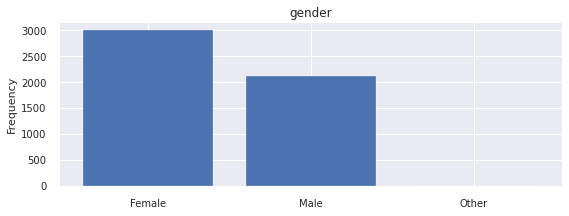

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


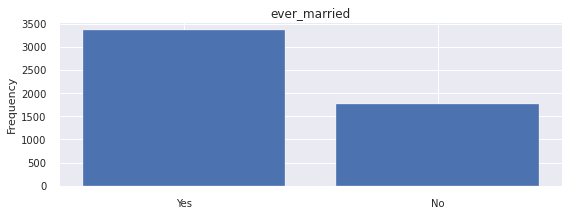

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


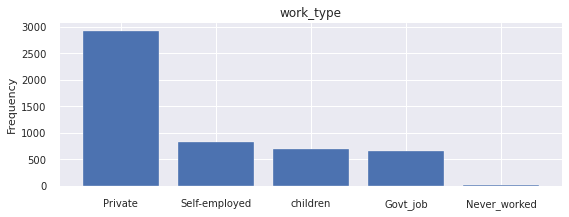

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


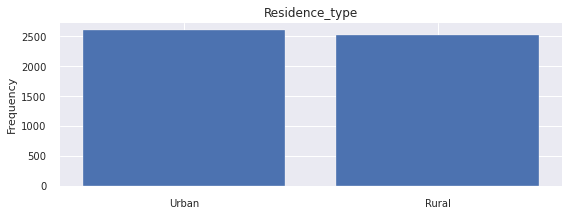

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


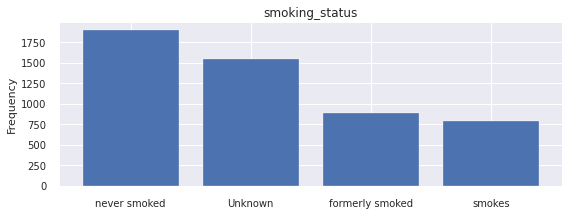

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [8]:
sns.set_style('darkgrid')
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

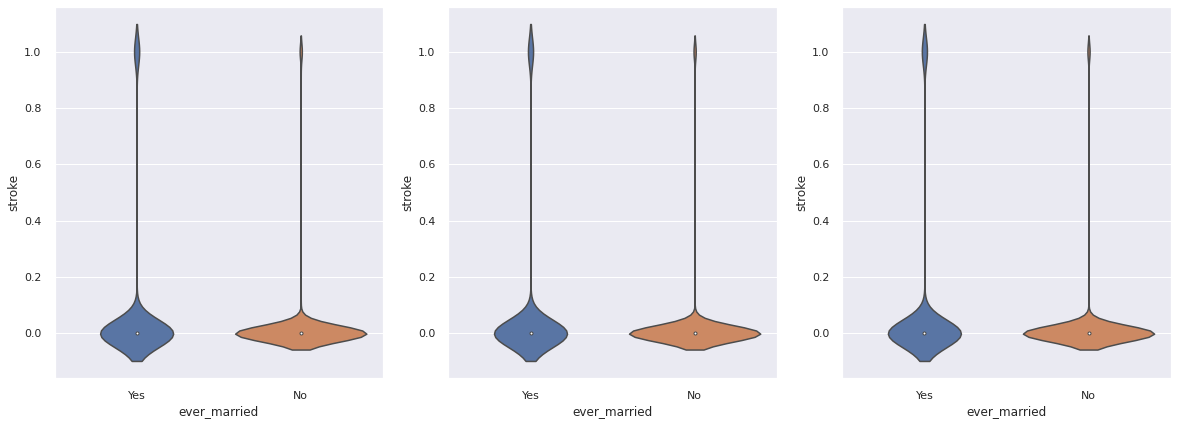

In [9]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)

<a id="6"></a> 
### Numerical Variables

In [10]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

Categorical variables:
['hypertension', 'heart_disease', 'stroke']


In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

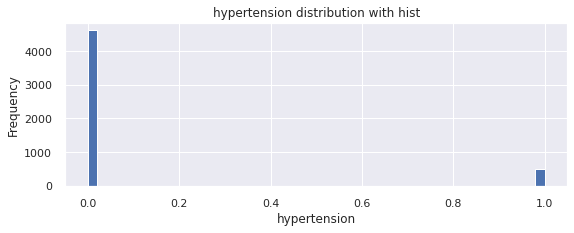

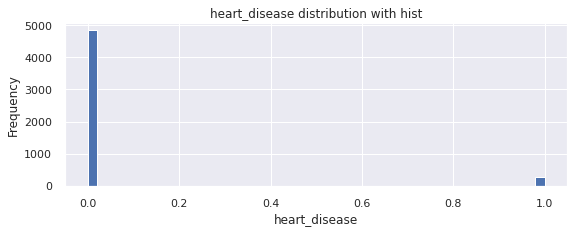

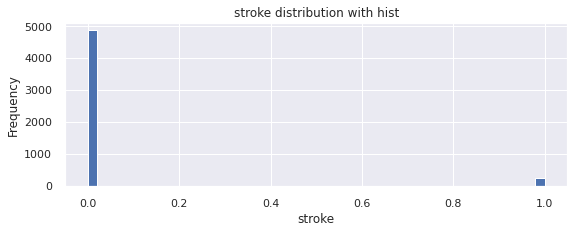

In [12]:
numerical_variables = ['hypertension', 'heart_disease', 'stroke']
for n in numerical_variables:
    plot_hist(n)

In [13]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


In [14]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

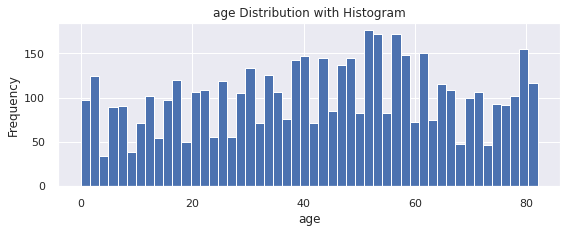

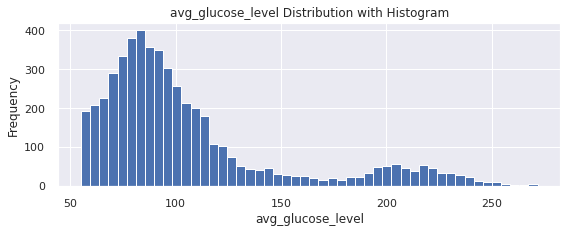

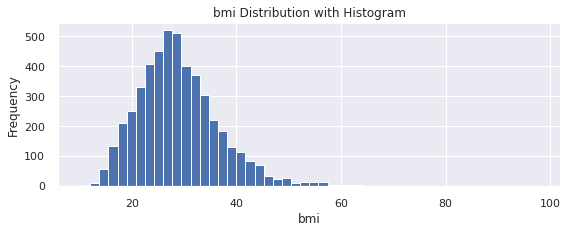

In [15]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

Text(0.5, 1.0, 'avg_glucose_level Interval and Counts')

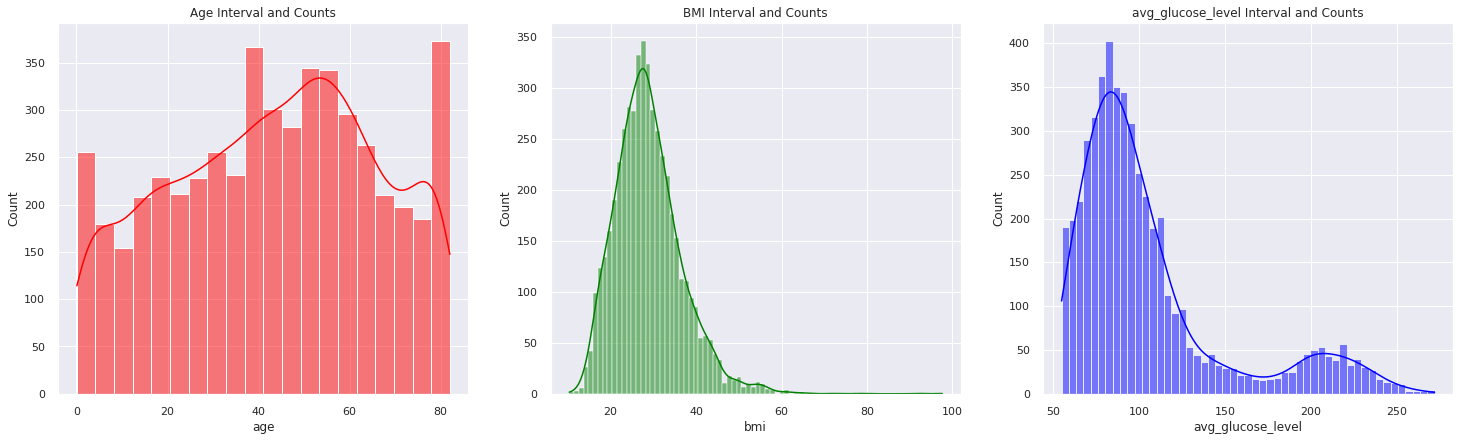

In [16]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['age'], color = 'red', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['avg_glucose_level'], kde = True, color = 'blue').set_title('avg_glucose_level Interval and Counts')

Text(0.5, 1.0, 'Stroke Interval and Counts')

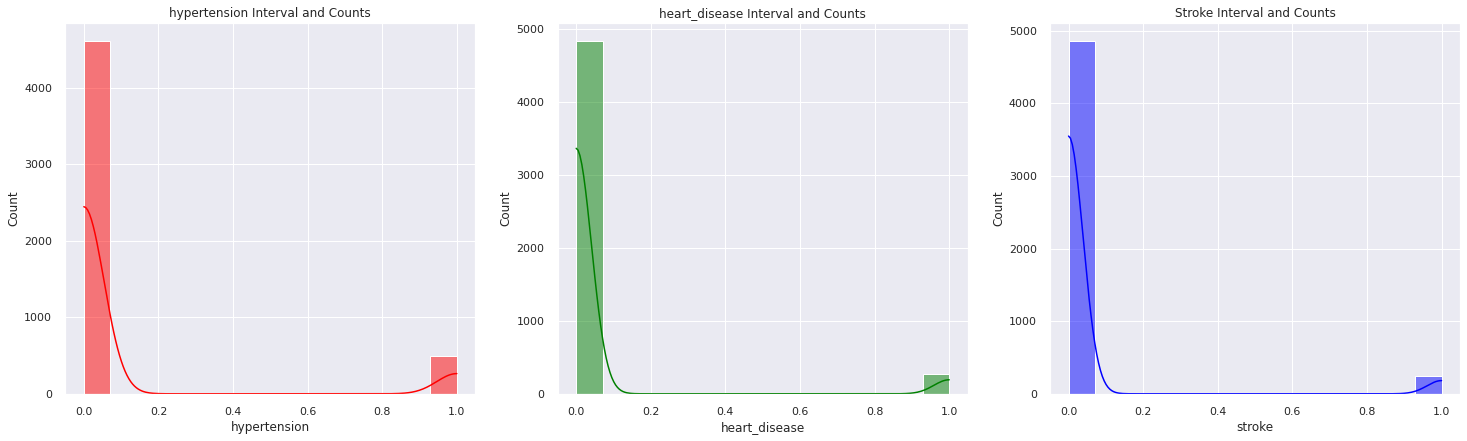

In [17]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['hypertension'], color = 'red', kde = True).set_title('hypertension Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['heart_disease'], color = 'green', kde = True).set_title('heart_disease Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['stroke'], kde = True, color = 'blue').set_title('Stroke Interval and Counts')

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

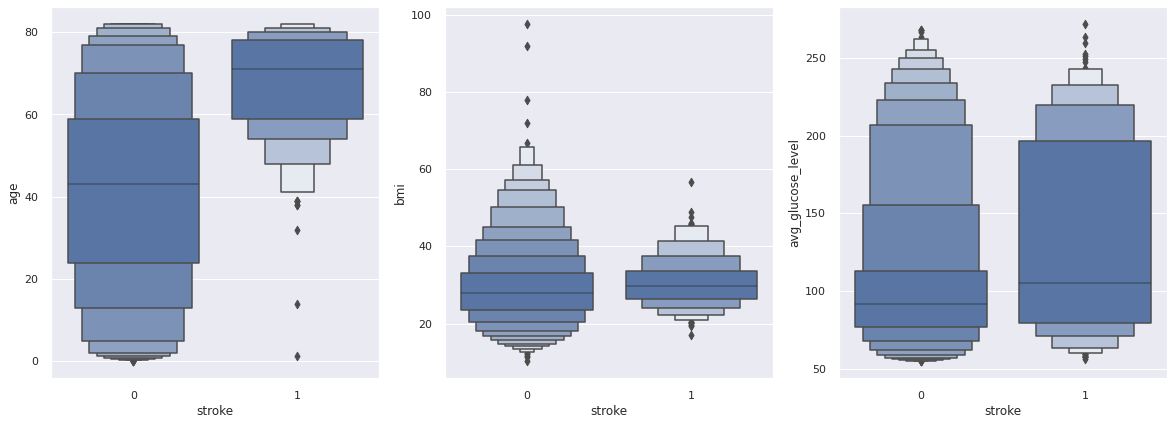

In [18]:
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['stroke'], y=dataset['age'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['stroke'], y=dataset['bmi'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['stroke'], y=dataset['avg_glucose_level'],
              color="b", 
              scale="linear", data=dataset)

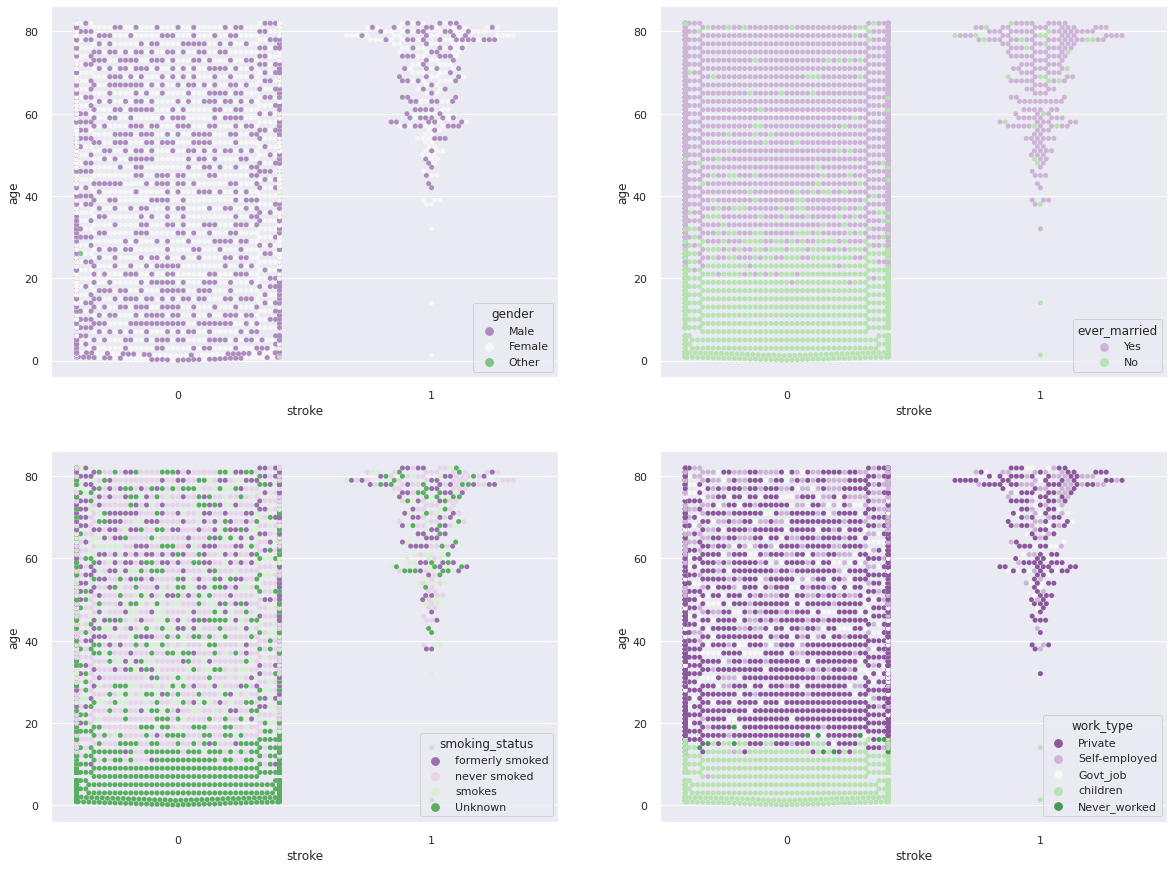

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.swarmplot(x="stroke", y="age",hue="gender", data=dataset, palette="PRGn")

plt.subplot(2,2,2)
sns.swarmplot(x="stroke", y="age",hue="ever_married", data=dataset, palette="PRGn")

plt.subplot(2,2,3)
sns.swarmplot(x="stroke", y="age",hue="smoking_status", data=dataset, palette="PRGn")

plt.subplot(2,2,4)
sns.swarmplot(x="stroke", y="age",hue="work_type", data=dataset, palette="PRGn")

plt.show()

<a id="7"></a> 
# Basic Data Analysis

<a id="8"></a> 
## Gender - Stroke

Average stroke rate by gender. Male's stroke rate is higher.

In [20]:
dataset[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,gender,stroke
1,Male,0.051064
0,Female,0.047094
2,Other,0.000000


In [21]:
df = dataset

labels = dataset['gender'].value_counts().index
pie1 = dataset['gender'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution of Genders",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Genders",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

<a id="9"></a> 
## Ever Married - Stroke

stroke rate based on married or not

In [22]:
dataset[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,ever_married,stroke
1,Yes,0.065613
0,No,0.016505


Text(0.5, 1.0, "Distribution of Samples by 'ever_married'")

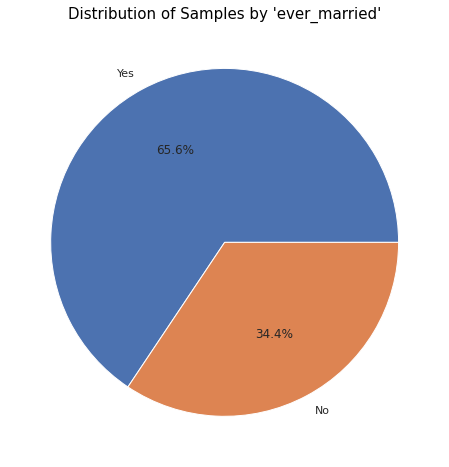

In [23]:
labels = dataset['ever_married'].value_counts().index
sizes = dataset['ever_married'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'ever_married'",color = 'black',fontsize = 15)

<a id="10"></a> 
## Work Type - Stroke

stroke rate based on work_type

In [24]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,work_type,stroke
3,Self-employed,0.079365
2,Private,0.050940
0,Govt_job,0.050228
4,children,0.002911
1,Never_worked,0.000000


In [25]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).count().sort_values(by="stroke",ascending = False)

,work_type,stroke
2,Private,2925
3,Self-employed,819
4,children,687
0,Govt_job,657
1,Never_worked,22


In [26]:
df = dataset

labels = dataset['work_type'].value_counts().index
pie1 = dataset['work_type'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie",
    },],
  "layout": {
        "title":"Distribution of Work Type",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Work Type",
                "x": 1,
                "y": 1,
             
            },
        ]
    }
}
iplot(fig)

<a id="11"></a> 
## Residence_type - Stroke

stroke rate based on residence type.

In [27]:
dataset[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,Residence_type,stroke
1,Urban,0.052003
0,Rural,0.045346


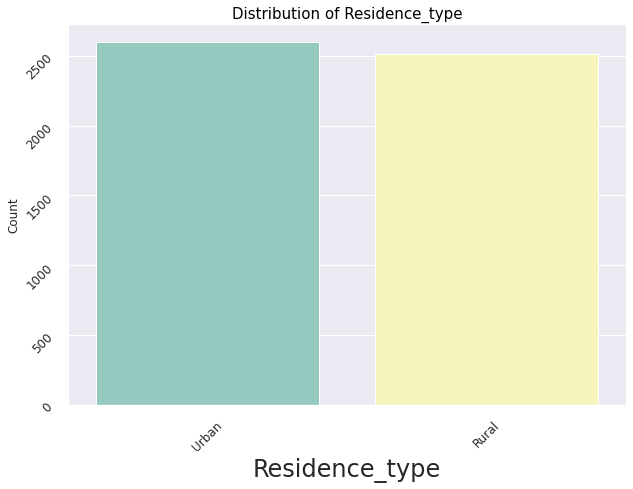

In [28]:
counts = dataset['Residence_type'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('Residence_type', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of Residence_type',color = 'black',fontsize=15)
plt.show()

<a id="12"></a> 
## smoking_status - Stroke

In [29]:
dataset[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


In [30]:
df = dataset

labels = dataset['smoking_status'].value_counts().index
pie1 = dataset['smoking_status'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie",
    },],
  "layout": {
        "title":"Distribution of Smoking Status",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Smoking Status",
                "x": 1,
                "y": 1,
             
            },
        ]
    }
}
iplot(fig)

<a id="13"></a> 
# Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [31]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="14"></a> 
# Correlation

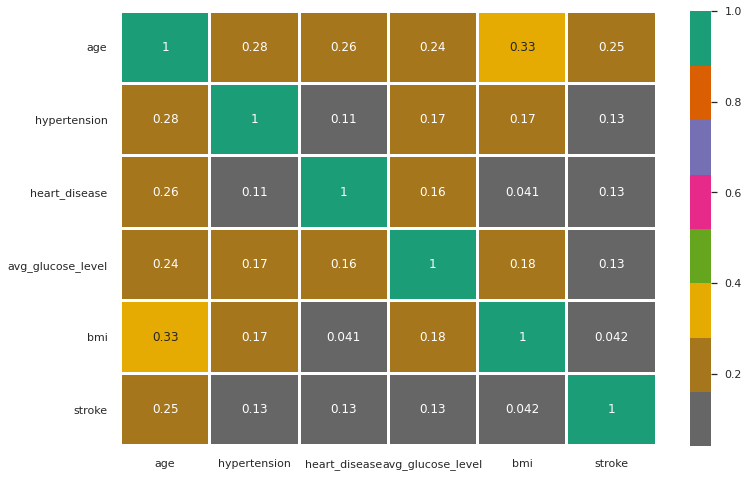

In [32]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

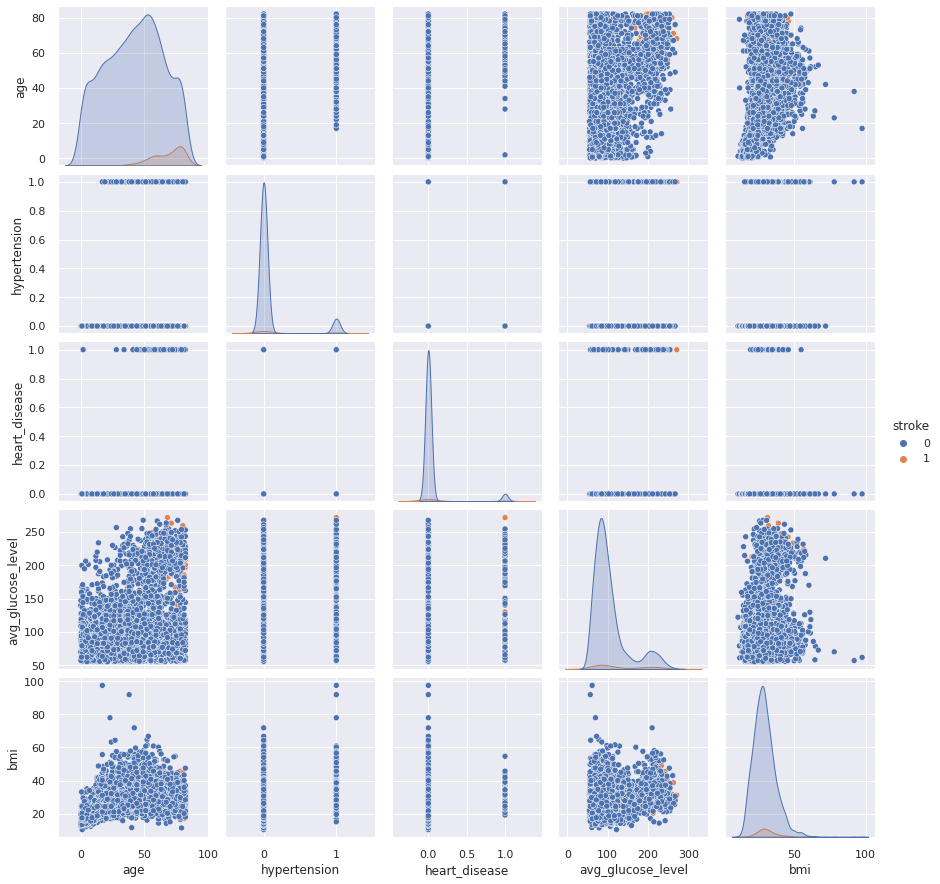

In [33]:
sns.pairplot(dataset, hue = 'stroke')

<a id="15"></a> 
# Anomaly Detection

Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [34]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [35]:
dataset.loc[detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
14,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
35,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
143,Female,69.0,1,1,No,Self-employed,Urban,72.17,36.8,never smoked,1
171,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1


In [36]:
# drop outliers
dataset = dataset.drop(detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)

In [37]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
4,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5030,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5031,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5032,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5033,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<a id="16"></a> 
# Missing Values

We have 201 null values in total. bmi includes all. (After Anomaly Detection, it decreases to 192)

<a id="17"></a> 
## bmi

In [38]:
dataset[dataset['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
5,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
17,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
18,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
28,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4964,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
4973,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5018,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5024,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


***How can we handle null values?***

* I think the most obvious differences for BMI will be between gender.

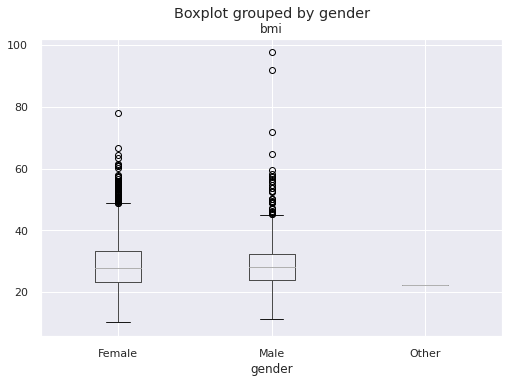

In [39]:
dataset.boxplot(column="bmi",by = "gender")
plt.show()

We get different BMI averages for women and men, although not very large. I will assign the total BMI mean as there are very few examples for the Others gender.

In [40]:
print("Mean of BMI value for Females: ", np.mean(dataset[dataset['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(dataset[dataset['gender'] == 'Male']['bmi']))
print("Mean of BMI value: ", np.mean(dataset['bmi']))

Mean of BMI value for Females:  29.035926055109936
Mean of BMI value for Males:  28.594683544303823
Mean of BMI value:  28.854614908114797


I filled null values with 0.

In [41]:
dataset['bmi'] = dataset['bmi'].fillna(0)

This loop assign these values to zero values accoring to the gender.

In [42]:
for i in range(0,5035):
    if(dataset['bmi'][i] == 0):
        if(dataset['gender'][i] == 'Male'):
            dataset['bmi'][i] = 28.594683544303823
        elif(dataset['gender'][i] == 'Female'):
            dataset['bmi'][i] = 29.035926055109936
        else:
            dataset['bmi'][i] = 28.854652338161664
        

In [43]:
dataset[dataset['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


There is no null values anymore.

<a id="18"></a> 
# Encoding

I will handle Categorical Values.

In [44]:
print("Unique Values for Gender", dataset['gender'].unique())
print("Unique Values for ever_married", dataset['ever_married'].unique())
print("Unique Values for work_type", dataset['work_type'].unique())
print("Unique Values for Residence_type", dataset['Residence_type'].unique())
print("Unique Values for smoking_status", dataset['smoking_status'].unique())

Unique Values for Gender ['Female' 'Male' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Self-employed' 'Private' 'Govt_job' 'children' 'Never_worked']
Unique Values for Residence_type ['Rural' 'Urban']
Unique Values for smoking_status ['never smoked' 'smokes' 'formerly smoked' 'Unknown']


<a id="19"></a> 
## Label Encoding

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [45]:
ever_married_mapping = {'No': 0, 'Yes': 1}
dataset['ever_married'] = dataset['ever_married'].map(ever_married_mapping)

In [46]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
dataset['Residence_type'] = dataset['Residence_type'].map(Residence_type_mapping)

<a id="20"></a> 
## One-Hot Encoding

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, I converted categorical datas to the binary values. This operation increases the accuracy.


In [47]:
onehotencoder = OneHotEncoder()

In [48]:
dataset['gender'] = pd.Categorical(dataset['gender'])
datasetDummies_gender = pd.get_dummies(dataset['gender'], prefix = 'gender_encoded')
datasetDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
5030,1,0,0
5031,1,0,0
5032,1,0,0
5033,0,1,0


In [49]:
dataset['work_type'] = pd.Categorical(dataset['work_type'])
datasetDummies_work_type = pd.get_dummies(dataset['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
5030,0,0,1,0,0
5031,0,0,0,1,0
5032,0,0,0,1,0
5033,0,0,1,0,0


In [50]:
dataset['smoking_status'] = pd.Categorical(dataset['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(dataset['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5030,0,0,1,0
5031,0,0,1,0
5032,0,0,1,0
5033,0,1,0,0


In [51]:
dataset.drop("gender", axis=1, inplace=True)
dataset.drop("work_type", axis=1, inplace=True)
dataset.drop("smoking_status", axis=1, inplace=True)

In [52]:
dataset = pd.concat([dataset, datasetDummies_gender], axis=1)
dataset = pd.concat([dataset, datasetDummies_work_type], axis=1)
dataset = pd.concat([dataset, datasetDummies_smoking_status], axis=1)
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,61.0,0,0,1,0,202.21,29.035926,1,1,0,0,0,0,0,1,0,0,0,1,0
1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
2,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
3,81.0,0,0,1,1,186.21,29.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
4,69.0,0,0,0,1,94.39,22.800000,1,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,80.0,1,0,1,1,83.75,29.035926,0,1,0,0,0,0,1,0,0,0,0,1,0
5031,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5032,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5033,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


Now, we don't have categorical variables. Dataset is ready for Machine Leraning algorithms.

<a id="21"></a> 
# Train - Test Split

In [53]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 3373
Total # of sample in validation dataset: 831
Total # of sample in test dataset: 831


Standardization is a method in which the mean value is 0 and the standard deviation is 1, and the distribution approaches the normal. The formula is as follows, we subtract the average value from the value we have, then divide it by the variance value.

In [55]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="22"></a> 
# Scores of Models

These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [56]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 20.782686036169583
Validation score of trained model: 95.18652226233453
Test score of trained model: 22.021660649819495
 
Confussion Matrix: 
[[149   0]
 [648  34]]

Accuracy : 0.22021660649819494
Precision: 1.0
Recall   : 0.04985337243401759
F1 score : 0.09497206703910614
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.19      1.00      0.32       149
           1       1.00      0.05      0.09       682

    accuracy                           0.22       831
   macro avg       0.59      0.52      0.20       831
weighted avg       0.85      0.22      0.13       831



############################################################################



BernoulliNB
Train score of trained model: 96.20515861251113
Validation score of trained model: 94.82551143200962
Test score of trained model: 95.90854392298436
 
Confussion Matrix: 
[[797  34]
 [  0   0]]

Accuracy : 0.95908543922984

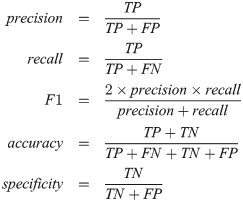

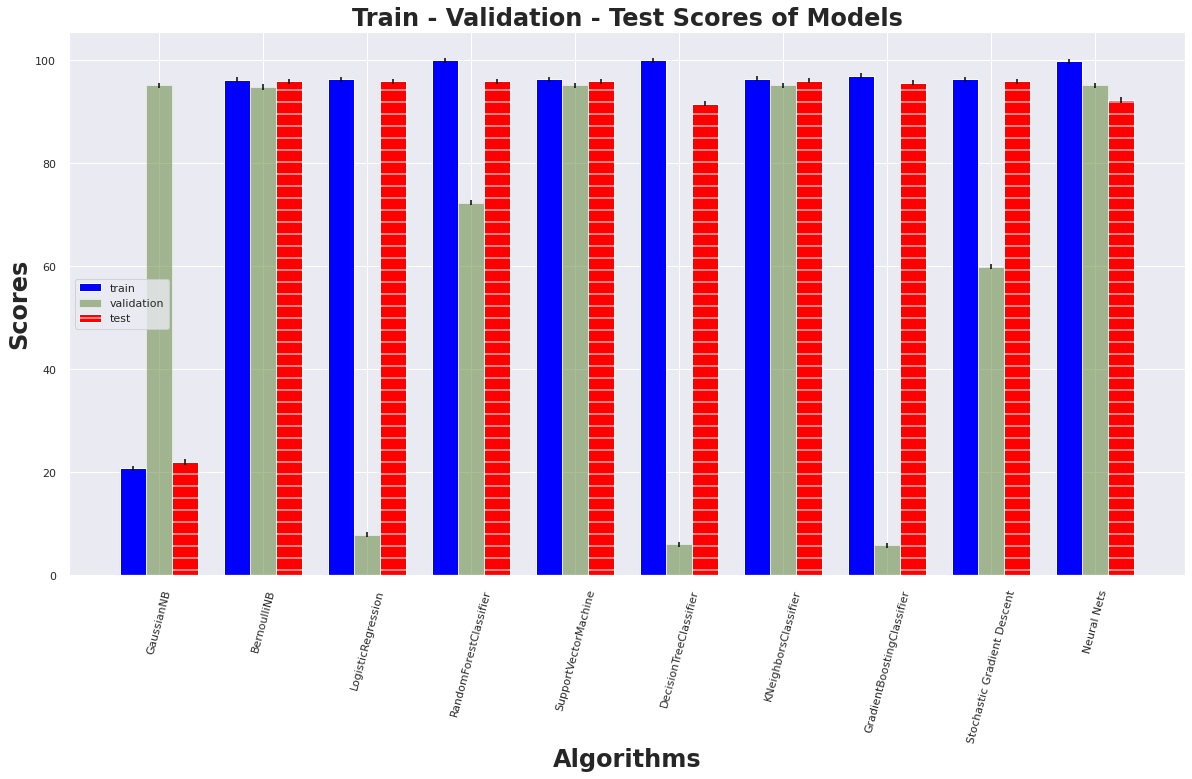

In [57]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [58]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 22.021660649819495
Accuracy of BernoulliNB -----> 95.90854392298436
Accuracy of LogisticRegression -----> 95.90854392298436
Accuracy of RandomForestClassifier -----> 95.90854392298436
Accuracy of SupportVectorMachine -----> 95.90854392298436
Accuracy of DecisionTreeClassifier -----> 91.57641395908543
Accuracy of KNeighborsClassifier -----> 96.028880866426
Accuracy of GradientBoostingClassifier -----> 95.66787003610109
Accuracy of Stochastic Gradient Descent -----> 95.90854392298436
Accuracy of Neural Nets -----> 92.29843561973526


<a id="23"></a> 
# Evaluation of Models

I evaluated these models according to their accuracies. Best algorithm is KNN with 96.02%. So, I will make k-Fold Cross Validation and Hyper-Parameter Optimization for KNN algorithm.

In [59]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

train_score = knn_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score}')

validation_score = knn_model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score}')

test_score = knn_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

y_predictions = knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)


print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

Train score of trained model: 0.9644233619922917
Validation score of trained model: 0.9518652226233454
Test score of trained model: 0.9602888086642599
Accuracy: 96.028880866426

Confussion matrix: 
[[797  33]
 [  0   1]]



In [60]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(str), test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = knn_model
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='purp'
    )
])
fig.show()

<a id="24"></a> 
## k-Fold Cross Validation

Cross Validation will enable us to see whether we are facing an overfitting problem and also to see the quality of our model. Thus, it will enable us to test the performance of our model before encountering high error rates in the test data set that we have not seen yet. It is a method that is frequently used because it is easy to apply.

***cv = 10 means k = 10 for KNN.***

In [61]:
print(cross_val_score(knn_model, X = X_train, y = y_train, cv = 10))

[1.         1.         1.         1.         1.         0.57142857
 1.         1.         0.83333333 1.        ]


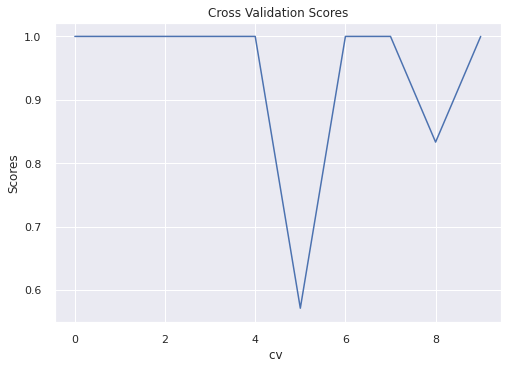

In [62]:
g = cross_val_score(knn_model, X = X_train, y = y_train, cv = 10)
plt.title("Cross Validation Scores")
plt.xlabel("cv ")
plt.ylabel("Scores")
plt.plot(g)

In [63]:
accuracies = cross_val_score(estimator = knn_model, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean):", accuracies.mean()*100, "%")
print("std: ", accuracies.std()*100)

Accuracy (mean): 94.04761904761905 %
std:  13.26726830071908


In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as: 

Source: https://en.wikipedia.org/wiki/Mean_absolute_error

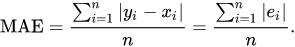

In [64]:
scores = cross_val_score(knn_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)
print ("MAE:", scores.mean())

MAE: -0.05952380952380952


<a id="25"></a> 
## Hyper-Parameter Optimization

Unlike parameters, hyperparameters are not learned during training the model. They are determined by the data scientist before the modeling phase. For example, KNN algorithm, which is one of the non-parametric classification algorithms, makes classification by looking at the nearest k neighbors to the desired value. Here, the k number (n_neighbors:) and the distance metric (metric:) to be used are the hyperparameters that should be specified by the data scientist before the modeling, which increases the performance of the model.

**Hyperparameter optimization** is the process of finding the most suitable hyperparameter combination according to the success metric specified for a machine learning algorithm.

Given that there are dozens of hyperparameters for a machine learning algorithm and dozens of values these hyperparameters can take, it's clear how difficult it will be to try all combinations one by one and pick the best combination. For this reason, different methods have been developed for hyperparameter optimization. GridSearcCV and RandomizedSearchCV are among these methods.

<a id="26"></a> 
### GridSearchCV

For the hyperparameters and their values that are desired to be tested in the model, a separate model is established with all combinations and the most successful hyperparameter set is determined according to the specified metric.

In [65]:
parameters = {'n_neighbors': [2,3,5,7,9,11,15,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming']
             }

gcv = GridSearchCV(knn_model, parameters, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [66]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 96.92307692307693
GridSearchView Best Estimator: KNeighborsClassifier(metric='manhattan', weights='distance')
GridSearchView Best Params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


<a id="27"></a> 
### RandomizedSearchCV

A set of hyperparameters is randomly selected and tested by cross-validation and the model set up. These steps continue until the specified calculation time limit or the number of iterations is reached.

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_neighbors': [2,3,5,7,9,11,15,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming']
             }

randomizedcv = RandomizedSearchCV(knn_model, params, n_iter=200, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [68]:
print(f'RandomizedSearchCV Best Score: {randomizedcv.best_score_*100}')
print(f'RandomizedSearchCV Best Estimator: {randomizedcv.best_estimator_}')
print(f'RandomizedSearchCV Best Params: {randomizedcv.best_params_}')

RandomizedSearchCV Best Score: 96.92307692307693
RandomizedSearchCV Best Estimator: KNeighborsClassifier(n_neighbors=3)
RandomizedSearchCV Best Params: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'minkowski', 'algorithm': 'auto'}


<a id="28"></a> 
## Best Features Selection

Feature Importance and Best Features

In [69]:
# I wrote this part again because X y changed above, in the k-nn visualization. 
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 3373
Total # of sample in validation dataset: 831
Total # of sample in test dataset: 831


RandomForestClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




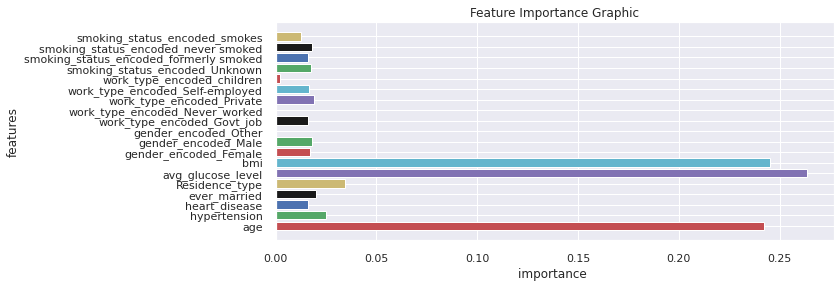

DecisionTreeClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




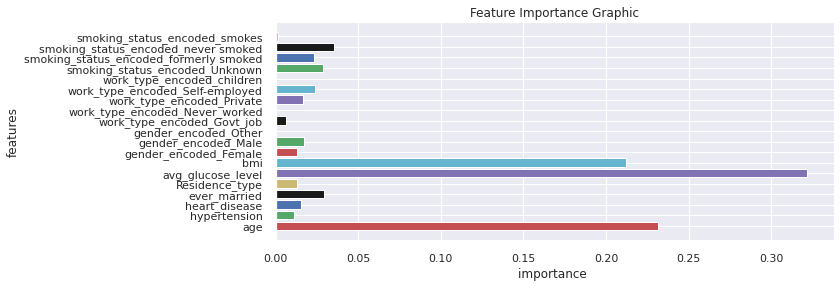

GradientBoostingClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




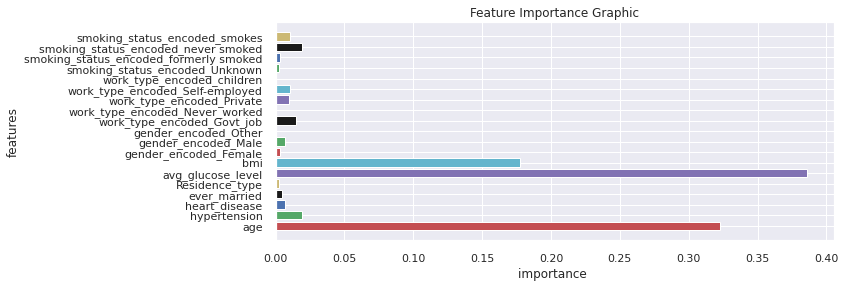

In [70]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(10,4))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
  plt.show()

*Source for Feature Importance Code:* https://www.kaggle.com/umutalpaydn/heart-disease-analysis-classification#Feature-Importance

In [71]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (5035, 19) New shape: (5035, 7)


LogisticRegression
Old Shape: (5035, 19) New shape: (5035, 10)


Stochastic Gradient Descent
Old Shape: (5035, 19) New shape: (5035, 7)




<a id="29"></a> 
# Conclusion

In this notebook, I examined Stroke Prediction Dataset. Firstly, I made Exploratory Data Analysis, Visualization, then I applied Machine Learning algorithms to this dataset. 

If you liked this notebook, you might want to take a look at my other notebooks. Here are the tutorials about [Plotly](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners/comments#Conclusion) and [Seaborn](https://www.kaggle.com/bariscal/eda-and-visualization-with-seaborn).

* If you have questions, please comment them. I will try to explain if you don't understand.
* If you liked this notebook, please UPVOTE.

* ***Thank you for your time.***